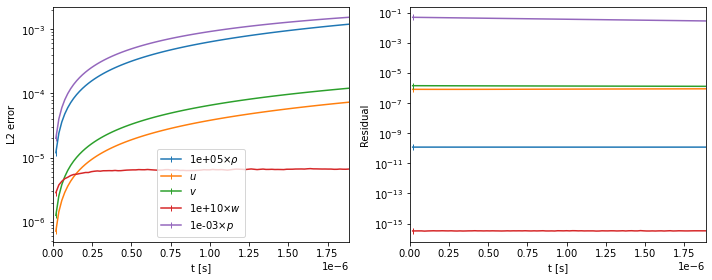

In [167]:
# Analysis convergence properties of our solver

import numpy as np
import matplotlib.pyplot as plt

labels = [r'$\rho$', r'$u$', r'$v$', r'$w$', r'$p$']
scale = [1e5, 1, 1, 1e10, 1e-3]

# Load data
data = np.loadtxt('conv_test/ns/teno5-64.log')

# Plot data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
for i in range(5):
  plt.semilogy(data[:, 0], scale[i] * data[:, i+1], '|-', markevery=100, label=('{:.0e}'.format(scale[i])+r'$\times$')*(scale[i] != 1)+labels[i])
plt.ylabel('L2 error')
plt.xlabel('t [s]')
plt.xlim([0, data[-1, 0]])
plt.legend()

plt.subplot(1, 2, 2)
for n in range(5):
  plt.semilogy(data[:, 0], data[:, n+6], '|-', markevery=100)
  # plt.semilogy(data[:-1, 0], np.abs(data[1:, n+1]-data[:-1, n+1]) / data[1:, n+1], '|-', markevery=100)
# plt.semilogy(data[1:, 0], 5e-3*np.ones(len(data[1:, 0])), 'k--')
# plt.ylabel('Relative change in L2 error')
  plt.ylabel('Residual')
plt.xlabel('t [s]')
plt.xlim([0, data[-1, 0]])
# plt.text(data[0, 0], 1e-2, "0.5% change", ha='left', va='top')

plt.tight_layout()

[0.000123626, 1.36275e-06, 1.19027e-08, 9.56432e-11] 
 [1.26604e-01 3.67493e-03 7.28061e-05 1.24139e-06] 
 [2.26921e-01 6.40704e-03 1.20084e-04 1.97594e-06] 
 [6.81552e-16 6.79486e-16 6.63914e-16 6.72337e-16] 
 [130.24, 14.8882, 1.52541, 0.112937]


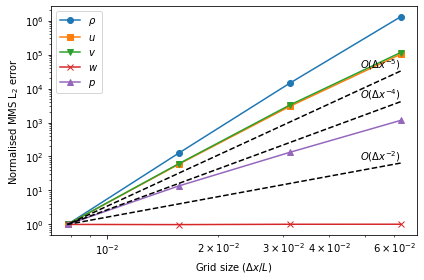

In [133]:
N = np.array([16, 32, 64, 128])

rho_err, u_err, v_err, w_err, p_err = ([] for _ in range(5))
for i in range(len(N)):
  data = np.loadtxt("conv_test/ns/teno5-{}.log".format(N[i]))

  # rho_err.append(np.sqrt(np.max(data[:, 1]))) # Max value
  # u_err.append(np.sqrt(np.max(data[:, 2])))
  # v_err.append(np.sqrt(np.max(data[:, 3])))
  # w_err.append(np.sqrt(np.max(data[:, 4])))
  # p_err.append(np.sqrt(np.max(data[:, 5])))
  
  n = -1 # n steps
  rho_err.append(data[n, 1])
  u_err.append(data[n, 2])
  v_err.append(data[n, 3])
  w_err.append(data[n, 4])
  p_err.append(data[n, 5])

  # start_avg = int(data.shape[0]*0.75) 
  # rho_err.append((np.mean(data[start_avg:, 1]))) 
  # u_err.append((np.mean(data[start_avg:, 2])))
  # v_err.append((np.mean(data[start_avg:, 3])))
  # w_err.append((np.mean(data[start_avg:, 4])))
  # p_err.append((np.mean(data[start_avg:, 5])))

u_err = np.array(u_err)
v_err = np.array(v_err)
w_err = np.array(w_err)

# plt.subplot(1,2,2)
plt.loglog(1/N, rho_err / rho_err[-1], 'o-', label=r'$\rho$')
plt.loglog(1/N, u_err / u_err[-1], 's-', label=r'$u$')
plt.loglog(1/N, v_err / v_err[-1], 'v-', label=r'$v$')
plt.loglog(1/N, w_err / w_err[-1], 'x-', label=r'$w$')
plt.loglog(1/N, p_err / p_err[-1], '^-', label=r'$p$')
for j in [2,4,5]:
  plt.loglog(1/N, (N[-1]/N)**j, 'k--')
  plt.text(1/N[0], (N[-1]/N[0])**j, r'$O(\Delta x^{{{}}})$'.format(-j), 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel(r'Grid size ($\Delta x/L$)')
plt.ylabel('Normalised MMS L$_2$ error')
plt.legend()
plt.tight_layout()

print(rho_err, '\n', u_err, '\n', v_err, '\n', w_err, '\n', p_err)

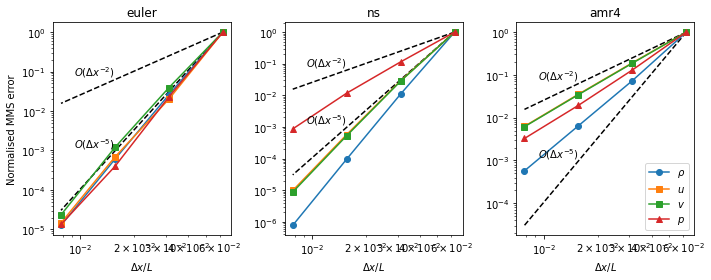

In [161]:
N = np.array([16, 32, 64, 128])
settings = ["euler", "ns", "amr4"]
scheme = "teno5"

plt.figure(figsize=(10, 4))

for i in range(len(settings)):
  rho_err, u_err, v_err, p_err = ([] for _ in range(4))
  for logname in N:
    data = np.loadtxt("conv_test/"+settings[i]+"/"+scheme+"-"+str(logname)+".log")
    rho_err.append(data[-1, 1])
    u_err.append(data[-1, 2])
    v_err.append(data[-1, 3])
    p_err.append(data[-1, 5])

  plt.subplot(1, len(settings), i+1)
  for j in [2,5]:
    plt.loglog(1/N, (N[0]/N)**j, 'k--')
    plt.text(1/N[-2], (N[0]/N[-2])**j, r'$O(\Delta x^{{{}}})$'.format(-j), 
             verticalalignment='bottom', horizontalalignment='right') 
  plt.loglog(1/N, rho_err / rho_err[0], 'o-', label=r'$\rho$')
  plt.loglog(1/N, u_err / u_err[0], 's-', label=r'$u$')
  plt.loglog(1/N, v_err / v_err[0], 's-', label=r'$v$')
  plt.loglog(1/N, p_err / p_err[0], '^-', label=r'$p$') 
  plt.xlabel(r'$\Delta x / L$')
  plt.title(settings[i])
  if (i == 0):
    plt.ylabel('Normalised MMS error')
  if (i == len(settings)-1):
    plt.legend()

plt.tight_layout()

plt.savefig('convergence.png', dpi=300, facecolor='white')